# Information Retrieval in High Dimensional Data - Assignment 1

## Group 29 - Members List
***
* Smith Agarwal
* Shyam Arumugaswamy
* Mainak Ghosh
* Shayoni Halder
* Aadhithya Sankar

## Task 1
***

Let $C_d$ = {x $\in$ $\mathbb{R}^p||x||_\infty \le \frac{d}{2}$} denote the p-dimensional hypercube of edge length d, centered at the origin.
* Assume X to be uniformly distributed in $C_1$. Determine d in dependence of p and q $\in$ [0, 1], such that

\begin{align}
Pr(X \in C_d) = q
\end{align}
holds.
* Let the components of the p-dimensional random variable $X^p$ be independent and have the standard normal distribution. It is known that <br> Pr( ||$X^p$|| $\le$ 2.576 ) = 0.99. For an arbitrary p, determine the probability Pr( ||$X^p$|| $>$ 2.576 ) for any of the components of $X^p$ to lie outside of the interval [−2.576, 2.576]. Evaluate the value for p = 2, p = 3 and p = 500.

### Solution

1.1 The maximum norm that $||X||_\infty$, X in $C_d$, can have is $\frac{d}{2}$. As the hypercube is centered at origin, therefore the maximum distance between two edges is d. Hence, the total volume of a p-dimensional hypercube is $d^p$. Let q be the probability for any point X (uniformly distributed) in $C_d$.

Then, the value of q is, $q=\frac{1}{d^p}$
   =>   $d =  q^{\frac{-1}{p}}$


1.2 Now, 
\begin{equation*}
Pr(||X||_\infty \leq 2.576) = Pr[max(|X_i|) \leq 2.576] , i=1 :  p
\end{equation*}


\begin{eqnarray*}
Pr[max(|X_i|) \leq 2.576]&=&\Pi_{i=1}^{p}Pr[|X_i| \leq 2.576]\\
&=&(0.99)^p
\end{eqnarray*}

Therefore,
\begin{eqnarray*}
Pr(||X||_\infty > 2.576)&=&1 - Pr(||X||_\infty \leq 2.576)\\
&=&1 - (0.99)^p
\end{eqnarray*}

For p=2, $Pr(||X||_\infty > 2.576) = 1 - (0.99)^2 = 0.0199$

For p=3, $Pr(||X||_\infty > 2.576) = 1 - (0.99)^3 = 0.0297$

For p=500, $Pr(||X||_\infty > 2.576) = 1 - (0.99)^{500} = 0.9934$


## Task 2
***

Provide the PYTHON code to the following tasks (the code needs to be commented properly):

* Sample 100 uniformly distributed random vectors from the box $[−1, 1]^d$ for d = 2.

In [1]:
#Solution
import numpy as np

def samp_uniform_rand_vect(low,high,n,d):
    #The sample set is created uniformly using the sample size and dimensions designated.
    #The high and low values are the two limits of the vectors values range
    X = np.random.uniform(low=low,high=high,size=(n,d))
    return(X)

X = samp_uniform_rand_vect(-1,1,100,2)
X

array([[ 0.12838723,  0.49207528],
       [ 0.91891644,  0.73043983],
       [-0.25258546, -0.43313408],
       [-0.4445499 , -0.82906079],
       [-0.43649066, -0.78751038],
       [-0.21305842,  0.67355299],
       [-0.91197377, -0.79551599],
       [-0.37895068,  0.685113  ],
       [-0.93702051,  0.22787607],
       [ 0.00986787, -0.65463958],
       [ 0.15633814, -0.78711636],
       [ 0.57818266, -0.86168897],
       [ 0.79081855, -0.16887969],
       [-0.09427892,  0.06170747],
       [ 0.0098739 , -0.09673876],
       [-0.82406388,  0.21915124],
       [-0.26018109,  0.71326697],
       [-0.29092552,  0.93410338],
       [-0.99734372,  0.31030512],
       [-0.8878207 ,  0.88411315],
       [ 0.66736421, -0.0245734 ],
       [-0.79341817, -0.41762424],
       [-0.04827756, -0.19375983],
       [-0.54634922,  0.66437335],
       [-0.20561347, -0.87596788],
       [ 0.58175773,  0.77557034],
       [ 0.21783134, -0.5834552 ],
       [ 0.88981837,  0.69961272],
       [ 0.68232817,

* For each of the 100 vectors determine the minimum angle to all other vectors. Then compute the average of these minimum angles.Note that for two vectors x, y the cosine of the angle between the two vectors is defined as
\begin{align}
cos (\angle (x, y)) = \frac{\langle x, y\rangle⟩}{||x|| ||y||}
\end{align}

In [2]:
#Solution
from scipy.spatial import distance as dist

# We will use scipy.spatial.cdist library to compute the angle in radians
# The documentation can be found here https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist
# Usage : Y = cdist(XA, XB, 'cosine')
# Using cosine as metric will give the distance(dissimilarity) between two vectors
# We find the the similarity by subtracting the result from 1
# Cosine similarity between two non-zero vectors of an inner product space measures the cosine of the angle between them

def angle_between_matrix(x, y):
    costheta = 1 - dist.cdist(x, y, 'cosine')
    return np.arccos(costheta)

def avg_min_angle(X):
    # The input argument of this function is a 100x100 matrix
    # This matrix represents angle between any two vectors in a list
    # Our task: For each of the 100 vectors determine the minimum angle to all other vectors
    # As the diagonal elements of this matrix will always contain the value 0 (angle between vector to itself is 0)
    # We Fill diagonal elements with value infinity(inf) so that our function doesn't consider diagonal elements when finding minimum angle 
    np.fill_diagonal(X, np.inf)
    min_ang_vec = X.min(axis=1) # Finding the rowmin which gives us the minimum angle
    avg_min_angle = np.mean(min_ang_vec) #Finding the average of the above minimum angles
    return avg_min_angle

# Compute the angle matrix
X_mat = angle_between_matrix(X,X)

# Find the average minimum angle for dimension 2
avg_min_angle(X_mat)

0.02852700261717135

* Repeat the above for dimensions d = 1, . . . , 1000 and use the results to plot the average minimum angle against the dimension.

In [5]:
#Solution
avg_min_angle_list = []
for i in range(1,1001):
    X_temp = samp_uniform_rand_vect(-1,1,100,i) #Sample 100 vectors with dimension i
    X_temp_mat = angle_between_matrix(X_temp,X_temp) #Calculating the angle matrix 
    avg_min_ang_temp = avg_min_angle(X_temp_mat) #Calculating average minimum angle
    avg_min_angle_list.append(avg_min_ang_temp) # Storing the result in a list
    print("Average min angle for dimension "+str(i)+": "+str(avg_min_ang_temp))


Average min angle for dimension 1: 0.0
Average min angle for dimension 2: 0.0332618214522642
Average min angle for dimension 3: 0.15460087967597244
Average min angle for dimension 4: 0.3352490756574619
Average min angle for dimension 5: 0.4401950354365415
Average min angle for dimension 6: 0.5373290959150814
Average min angle for dimension 7: 0.5952339436111803
Average min angle for dimension 8: 0.668595066197355
Average min angle for dimension 9: 0.6989694153679106
Average min angle for dimension 10: 0.7443603413046843
Average min angle for dimension 11: 0.806972006899156
Average min angle for dimension 12: 0.8084023364893917
Average min angle for dimension 13: 0.8552921584745102
Average min angle for dimension 14: 0.8889826396330186
Average min angle for dimension 15: 0.9087324364638423
Average min angle for dimension 16: 0.8985337038351824
Average min angle for dimension 17: 0.939494423088812
Average min angle for dimension 18: 0.9634927005224111
Average min angle for dimension 19: 

Average min angle for dimension 218: 1.4005241480153305
Average min angle for dimension 219: 1.4034160118180068
Average min angle for dimension 220: 1.3994783212306465
Average min angle for dimension 221: 1.4017970575346619
Average min angle for dimension 222: 1.403273723776653
Average min angle for dimension 223: 1.4000432815357817
Average min angle for dimension 224: 1.4039383280547924
Average min angle for dimension 225: 1.407052467233832
Average min angle for dimension 226: 1.4084014464834829
Average min angle for dimension 227: 1.3924080463066482
Average min angle for dimension 228: 1.4108666659074611
Average min angle for dimension 229: 1.403513570185476
Average min angle for dimension 230: 1.4121786726600112
Average min angle for dimension 231: 1.405022710938759
Average min angle for dimension 232: 1.406178878606117
Average min angle for dimension 233: 1.4099482340923783
Average min angle for dimension 234: 1.4017399388201341
Average min angle for dimension 235: 1.40632319726949

Average min angle for dimension 401: 1.4420410217821455
Average min angle for dimension 402: 1.4515944847198363
Average min angle for dimension 403: 1.4475934182753623
Average min angle for dimension 404: 1.4499421670244774
Average min angle for dimension 405: 1.4432613285391562
Average min angle for dimension 406: 1.445579172352555
Average min angle for dimension 407: 1.4416004905898838
Average min angle for dimension 408: 1.44592885170712
Average min angle for dimension 409: 1.4481978655547487
Average min angle for dimension 410: 1.4500909620055997
Average min angle for dimension 411: 1.4486680400019807
Average min angle for dimension 412: 1.4419027348419693
Average min angle for dimension 413: 1.4446903648671705
Average min angle for dimension 414: 1.4427557264846491
Average min angle for dimension 415: 1.4498207805925931
Average min angle for dimension 416: 1.4488074084132245
Average min angle for dimension 417: 1.4450508669094828
Average min angle for dimension 418: 1.450034900849

Average min angle for dimension 550: 1.4644620309867418
Average min angle for dimension 551: 1.465115411967041
Average min angle for dimension 552: 1.4648968387834858
Average min angle for dimension 553: 1.461289481074317
Average min angle for dimension 554: 1.4624524951983724
Average min angle for dimension 555: 1.465543122590195
Average min angle for dimension 556: 1.4656510096434445
Average min angle for dimension 557: 1.4647901922876485
Average min angle for dimension 558: 1.4670000165607815
Average min angle for dimension 559: 1.4638997025954559
Average min angle for dimension 560: 1.4653629047429184
Average min angle for dimension 561: 1.4660632686143102
Average min angle for dimension 562: 1.4640431720119957
Average min angle for dimension 563: 1.4675957767969598
Average min angle for dimension 564: 1.4664485158280272
Average min angle for dimension 565: 1.4698697956097042
Average min angle for dimension 566: 1.4651019282523683
Average min angle for dimension 567: 1.465023871676

Average min angle for dimension 705: 1.476054046959868
Average min angle for dimension 706: 1.4784335640132502
Average min angle for dimension 707: 1.4758356553753202
Average min angle for dimension 708: 1.47801034669838
Average min angle for dimension 709: 1.4757962406189389
Average min angle for dimension 710: 1.4766389481356301
Average min angle for dimension 711: 1.4721022798281727
Average min angle for dimension 712: 1.4743592088855368
Average min angle for dimension 713: 1.4743853434372192
Average min angle for dimension 714: 1.477241172474923
Average min angle for dimension 715: 1.4760139460480224
Average min angle for dimension 716: 1.4796454670836956
Average min angle for dimension 717: 1.479213633648371
Average min angle for dimension 718: 1.4744121016965348
Average min angle for dimension 719: 1.4768767501743865
Average min angle for dimension 720: 1.4775690374636787
Average min angle for dimension 721: 1.4755249491895719
Average min angle for dimension 722: 1.47718553878322

Average min angle for dimension 866: 1.4858059043341718
Average min angle for dimension 867: 1.4850757005212023
Average min angle for dimension 868: 1.4864822478304267
Average min angle for dimension 869: 1.4870543009790707
Average min angle for dimension 870: 1.4856921476222413
Average min angle for dimension 871: 1.4826497555418297
Average min angle for dimension 872: 1.486572830014031
Average min angle for dimension 873: 1.4886605865424842
Average min angle for dimension 874: 1.48816177270094
Average min angle for dimension 875: 1.485051629942722
Average min angle for dimension 876: 1.4884613101887203
Average min angle for dimension 877: 1.4834419087079187
Average min angle for dimension 878: 1.4869491056661905
Average min angle for dimension 879: 1.4884843262879703
Average min angle for dimension 880: 1.4842390808566859
Average min angle for dimension 881: 1.485673719284585
Average min angle for dimension 882: 1.4820971532523046
Average min angle for dimension 883: 1.49061830256036

<IPython.core.display.Javascript object>


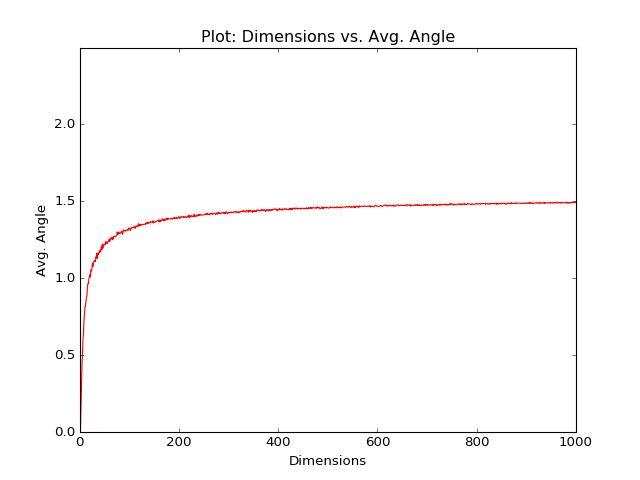

In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt

x_a = np.arange(1,1001)
_ = plt.plot(x_a,np.asarray(avg_min_angle_list),'r')
_ = plt.axis([1,1000,0,max(avg_min_angle_list)+1])
_ = plt.title('Plot: Dimensions vs. Avg. Angle')
_ = plt.xlabel('Dimensions')
_ = plt.ylabel('Avg. Angle')
_ = plt.show()

* Give an interpretation of the result. What conclusions can you draw for 2 randomly sampled vectors in a d-dimensional space?

### Solution

As the dimensions increase, the samples min angles average increase from a value close to 0 until it gets closer to 90 degrees(1.57 radians) in a logaritmic way. When the dimensions increase, the vectors start to become orthogonal between each other. Since the sample size is constant, we interprete that the vectors become more sparce with higher dimensions, becoming less relevant to each other as the dimensions increase.

* Does the result change if the sample size increases?

### Solution

In [6]:
# We now take a sample size of 500 to analyze the change in the result if any
avg_min_angle_list = []
for i in range(1,1001):
    X_temp = samp_uniform_rand_vect(-1,1,500,i) #Sample 500 vectors with dimension i
    X_temp_mat = angle_between_matrix(X_temp,X_temp) #Calculating the angle matrix 
    avg_min_ang_temp = avg_min_angle(X_temp_mat) #Calculating average minimum angle
    avg_min_angle_list.append(avg_min_ang_temp) # Storing the result in a list
    print("Average min angle for dimension "+str(i)+": "+str(avg_min_ang_temp))

Average min angle for dimension 1: 0.0
Average min angle for dimension 2: 0.006626688718494253
Average min angle for dimension 3: 0.07606220513149999
Average min angle for dimension 4: 0.18850245575940575
Average min angle for dimension 5: 0.27279400619373395
Average min angle for dimension 6: 0.3624807541910953
Average min angle for dimension 7: 0.4292057403975796
Average min angle for dimension 8: 0.4957082261128615
Average min angle for dimension 9: 0.5524007911878825
Average min angle for dimension 10: 0.6135793416999828
Average min angle for dimension 11: 0.6494401031710982
Average min angle for dimension 12: 0.6790757137966602
Average min angle for dimension 13: 0.7169377942098683
Average min angle for dimension 14: 0.7424514412085629
Average min angle for dimension 15: 0.7697989802411616
Average min angle for dimension 16: 0.7898839285447633
Average min angle for dimension 17: 0.8213076414171255
Average min angle for dimension 18: 0.8437293915948157
Average min angle for dimensi

Average min angle for dimension 151: 1.3208174330282285
Average min angle for dimension 152: 1.3255093370609807
Average min angle for dimension 153: 1.3268712430408531
Average min angle for dimension 154: 1.3270652711396556
Average min angle for dimension 155: 1.3244089660317862
Average min angle for dimension 156: 1.3273019819027085
Average min angle for dimension 157: 1.3316726071553542
Average min angle for dimension 158: 1.327316061193038
Average min angle for dimension 159: 1.327829333927036
Average min angle for dimension 160: 1.3303036662776324
Average min angle for dimension 161: 1.33156619823957
Average min angle for dimension 162: 1.3332653550491718
Average min angle for dimension 163: 1.337037588660669
Average min angle for dimension 164: 1.3304838684419944
Average min angle for dimension 165: 1.3350505315331604
Average min angle for dimension 166: 1.3338687685257513
Average min angle for dimension 167: 1.3337421181884221
Average min angle for dimension 168: 1.33485470806351

Average min angle for dimension 299: 1.3951501492276346
Average min angle for dimension 300: 1.394681830557245
Average min angle for dimension 301: 1.3960881457862346
Average min angle for dimension 302: 1.3933562479426191
Average min angle for dimension 303: 1.3968951409790809
Average min angle for dimension 304: 1.3959837033866211
Average min angle for dimension 305: 1.3943568253641938
Average min angle for dimension 306: 1.3954126398216948
Average min angle for dimension 307: 1.3976061602891123
Average min angle for dimension 308: 1.3958179819213097
Average min angle for dimension 309: 1.39812765563407
Average min angle for dimension 310: 1.4006525169885649
Average min angle for dimension 311: 1.3971726261451063
Average min angle for dimension 312: 1.3989351036678774
Average min angle for dimension 313: 1.3989852001663063
Average min angle for dimension 314: 1.3980372614898402
Average min angle for dimension 315: 1.401754556769703
Average min angle for dimension 316: 1.3999156972824

Average min angle for dimension 448: 1.4268669531027804
Average min angle for dimension 449: 1.4265818651143127
Average min angle for dimension 450: 1.427309480227802
Average min angle for dimension 451: 1.4271092442528674
Average min angle for dimension 452: 1.4284698052822946
Average min angle for dimension 453: 1.4265038416295674
Average min angle for dimension 454: 1.428632035555205
Average min angle for dimension 455: 1.4285106790138125
Average min angle for dimension 456: 1.428884647450083
Average min angle for dimension 457: 1.4285466689802084
Average min angle for dimension 458: 1.430621677258916
Average min angle for dimension 459: 1.429144637666538
Average min angle for dimension 460: 1.428224798555576
Average min angle for dimension 461: 1.4290884473673668
Average min angle for dimension 462: 1.428399549174387
Average min angle for dimension 463: 1.4306394565554883
Average min angle for dimension 464: 1.4292466403713862
Average min angle for dimension 465: 1.430265641606021


Average min angle for dimension 597: 1.446390137488338
Average min angle for dimension 598: 1.4470667025196227
Average min angle for dimension 599: 1.4470726475473037
Average min angle for dimension 600: 1.4475410577204082
Average min angle for dimension 601: 1.4477294532146812
Average min angle for dimension 602: 1.44611674793047
Average min angle for dimension 603: 1.4474706789137348
Average min angle for dimension 604: 1.4469223849525965
Average min angle for dimension 605: 1.4479087670258695
Average min angle for dimension 606: 1.446124457131131
Average min angle for dimension 607: 1.4471798216103093
Average min angle for dimension 608: 1.4475929383964725
Average min angle for dimension 609: 1.448664029762163
Average min angle for dimension 610: 1.4480206030632439
Average min angle for dimension 611: 1.4475088486531096
Average min angle for dimension 612: 1.4491886865719257
Average min angle for dimension 613: 1.4479971423679558
Average min angle for dimension 614: 1.44744371697202

Average min angle for dimension 744: 1.4602080443745344
Average min angle for dimension 745: 1.457344268312234
Average min angle for dimension 746: 1.4592818491904882
Average min angle for dimension 747: 1.458879369066843
Average min angle for dimension 748: 1.4593129559405142
Average min angle for dimension 749: 1.4608662043603082
Average min angle for dimension 750: 1.45991423876803
Average min angle for dimension 751: 1.459188670391879
Average min angle for dimension 752: 1.460922957499908
Average min angle for dimension 753: 1.4610217565048889
Average min angle for dimension 754: 1.460328912993231
Average min angle for dimension 755: 1.4602001866632999
Average min angle for dimension 756: 1.4607770596538594
Average min angle for dimension 757: 1.4617333089231133
Average min angle for dimension 758: 1.4599683569146882
Average min angle for dimension 759: 1.4596546630768612
Average min angle for dimension 760: 1.4593325957073984
Average min angle for dimension 761: 1.4603190515645246

Average min angle for dimension 891: 1.4681258124606709
Average min angle for dimension 892: 1.4697642601656233
Average min angle for dimension 893: 1.4691017225265763
Average min angle for dimension 894: 1.4691230763032503
Average min angle for dimension 895: 1.4705697731199396
Average min angle for dimension 896: 1.4690209087593535
Average min angle for dimension 897: 1.470548199477196
Average min angle for dimension 898: 1.4691630190152518
Average min angle for dimension 899: 1.4691413049171278
Average min angle for dimension 900: 1.4686594750444302
Average min angle for dimension 901: 1.470085980924764
Average min angle for dimension 902: 1.4710799448554797
Average min angle for dimension 903: 1.471634699690109
Average min angle for dimension 904: 1.4693850531457555
Average min angle for dimension 905: 1.46856107711733
Average min angle for dimension 906: 1.4692966509778302
Average min angle for dimension 907: 1.4688029050622768
Average min angle for dimension 908: 1.46986004228105

<IPython.core.display.Javascript object>


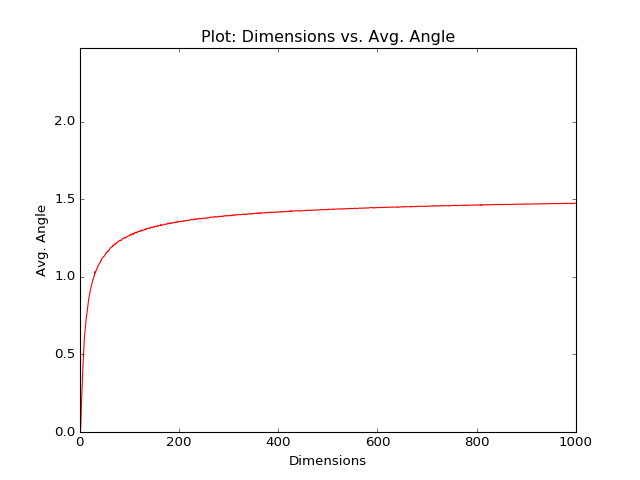

In [7]:
%matplotlib notebook

import matplotlib.pyplot as plt

x_a = np.arange(1,1001)
_ = plt.plot(x_a,np.asarray(avg_min_angle_list),'r')
_ = plt.axis([1,1000,0,max(avg_min_angle_list)+1])
_ = plt.title('Plot: Dimensions vs. Avg. Angle')
_ = plt.xlabel('Dimensions')
_ = plt.ylabel('Avg. Angle')
_ = plt.show()

### Interpretation

When we change the sample size, the slope changes slightly but as the dimensions increases, it becomes more insignificant. For example, look at the how on the first one, running with 100 samples, within the 20th dimension, the average min angles is already 1 radian, while on the test with 500 samples, it takes until 30th dimension to reach that value, but the difference becomes smaller with each dimension increase. We interprete the reason is that the sample becomes less relevant with the dimensionality increase, since it represents exponentially less on each dimension increase. This relates to the curse of dimensionality, where the increase in dimensions dissipates the 'relationship' between the samples, and to maintain the same weight of the 'relationship' from a smaller dimension (or belonging to a certain "neighbourhood"), an exponentially bigger sample would be require for each increment in dimensionality. The sample becomes more sparce with higher dimensions.

## Task 3

### Solution

3.1 Yes the numbers in the figure represent the joint probability between x and y as they sum up to be 1 and all are individually more than 0.


3.2. We first calculate the P(Y|X=2)
\begin{eqnarray*}
P(Y|X=2)&=&\frac{P(Y,X=2)}{P(X=2)}\\
&=&\frac{P(Y,X=2)}{0.05 + 0.14 + 0.4} = \frac{0.05}{0.59},\frac{0.14}{0.59}, \frac{0.4}{0.59}
\end{eqnarray*}
Now we calculate the expectation.
\begin{eqnarray*}
E_{Y|X=2}&=&\sum_{i=1}^{3}{Y_i P(Y_i|X=2)}\\
&=&1*\frac{0.4}{0.59} + 2 * \frac{0.14}{0.59} + 3* \frac{0.05}{0.59} = 1.407
\end{eqnarray*}
Similarly we calculate P(X=1|Y=3)
\begin{eqnarray*}
P(X=1|Y=3)&=&\frac{P(X=1,Y=3)}{P(Y=3)}\\
&=&\frac{0.13}{0.05 + 0.13} = 0.722
\end{eqnarray*}


3.3 We check if the sum of the joint density function is 1, i.e. we integrate over the given function.
\begin{eqnarray*}
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}{p(x,y) dx \ dy}&=&\int_{0}^{1/2}{\int_{0}^{1}{p(x,y) dx \ dy}}\\
&=&\int_{0}^{1/2}{[x]_0^1 \ dy} = \int_{0}^{1/2}{1 \ dy}\\
&=&[y]_0^{1/2} = \frac{1}{2} \neq 1
\end{eqnarray*}
Hence, this is not a joint probability density function.


3.4 Let $f_X(X)$ and $f_Y(Y)$ denote the marginal density probability function of X and Y respectively. To find $f_X(X)$ we integrate p(x,y) over Y
\begin{eqnarray*}
f_X(X)&=&\int_{0}^{\infty}{2 e^{-(x+y)} \ dy}\\
&=&2 e^{-x}\int_{0}^{\infty}{e^{-y} \ dy}\\
&=&-2e^{-x}[e^{-y}]_0^\infty = -2e^{-x} (0 -1)\\
&=&2e^{-x}
\end{eqnarray*}
Similarly to find  $f_Y(Y)$ we integrate over X
\begin{eqnarray*}
f_Y(Y)&=&\int_{0}^{y}{2 e^{-(x+y)} \ dx}\\
&=&2 e^{-y}\int_{0}^{y}{e^{-x} \ dx}\\
&=&-2e^{-y}[e^{-x}]_0^y = -2e^{-y} ( e^{-y} -1)\\
&=&2e^{-y} ( 1 - e^{-y} )
\end{eqnarray*}

Hence,
\begin{equation}
f_X(X)=
\begin{cases}
2e^{-x}, \text{  for x} \geq 0\\
0 \text{  otherwise}
\end{cases}
\end{equation}

\begin{equation}
f_Y(Y)=
\begin{cases}
2e^{-y} ( 1 - e^{-y} ), \text{  for y} \geq 0\\
0 \text{  otherwise}
\end{cases}
\end{equation}

3.5 We first find the marginal density probabilty function of Y,  $f_Y(Y)$
\begin{eqnarray*}
f_Y(Y)&=&\int_{0}^{3}{\frac{1}{15}(2x + 4y) \ dx}\\
&=&\frac{2}{15}\int_{0}^{3}{x \ dx} + \frac{4y}{15}\int_{0}^{3}{dx}\\
&=&\frac{1}{15}[x^2]_0^3 + \frac{4y}{15} [x]_0^3 = \frac{9-0}{15} + \frac{4y}{15} (3-0)\\
&=&\frac{9 + 12y}{15}
\end{eqnarray*}
Now, 
\begin{equation*}
f_{X|Y}(X|Y) = \frac{f_{X,Y}(X,Y)}{f_Y(Y)} \ = \ \frac{2x +4y}{9 + 12y}
\end{equation*}
\begin{eqnarray*}
f_{X|Y}(X\leq 2|Y=1/2)&=&\int_{0}^{2}{ f_{X|Y}(X|Y=1/2) \ dx}\\
&=&\int_{0}^{2}{ \frac{2x +2}{15} \ dx}\\
&=&\frac{2}{15}\int_{0}^{2}{ x \ dx} + \frac{2}{15}\int_{0}^{2}{ dx}\\
&=&\frac{2}{15}\Big[\frac{x^2}{2}\Big]_0^2 + \frac{2}{15}[x]_0^2 = \frac{4-0}{15} + \frac{2(2-0)}{15}\\
&=&\frac{4}{15} + \frac{4}{15}\\
&=&\frac{8}{15}
\end{eqnarray*}

## Task 4
***

Show that the covariance matrix $C$ of any random variable X $\in$ $\mathbb{R}^p$ is symmetric positive semidefinite, i.e. $C = C^⊤$ and $x^⊤ Cx \ge 0$ for any covariance matrix $C \in \mathbb{R}^p×p$ and any $x \in \mathbb{R}^p$.

### Solution

To show that the covariance matrix $C$ is symmetric, we will show that $C_{ij} = C_{ji}$ for any i,j = 1 to p.

Now, $C = E[(X-E[X])^T(X-E[X])]$

\begin{eqnarray*}
C_{ij}&=&E[(X_i-E[X_i])^T(X_j-E[X_j])]\\
&=&E[(X_i-E[X_i])(X_j-E[X_j])]\\
&=&E[[(X_j-E[X_j])(X_i-E[X_i])]]\\
&=&E[(X_j-E[X_j])^T(X_i-E[X_i])]\\
&=&C_{ji}
\end{eqnarray*}

Hence the covariance matrix is symmetric.

For a symmetric matrix $C$ (p x p) to be positive semi-definite, one can show that $u^TCu \geq 0$ for any vector $u$ (p x 1)

\begin{eqnarray*}
u^TCu&=&u^TE[(X-E[X])^T(X-E[X])]u\\
&=&E[u^T(X-E[X])^T(X-E[X])u]
\end{eqnarray*}

Taking $(X-E[X])u$ as a random variable $Z$ we have,
\begin{eqnarray*}
u^TCu&=&E[u^T(X-E[X])^T(X-E[X])u]\\
&=&E[Z^TZ]\\
&=&E[(Z-0)^T(Z-0)] = E[(Z-0)^2]\\
&=&Var[Z]\geq 0 \text{  where Z has an expectation of 0 i.e E[Z] = 0}
\end{eqnarray*}